In [28]:
# 준비작업
## 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator
import warnings
warnings.filterwarnings('ignore')

In [29]:
## 데이터 로딩
housing = fetch_california_housing()
X = housing.data
feature_names = housing.feature_names

## 데이터프레임으로 변환
df = pd.DataFrame(X, columns=feature_names)

In [30]:
# 데이터 탐색 및 전처리
## 구조, 요약통계량 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


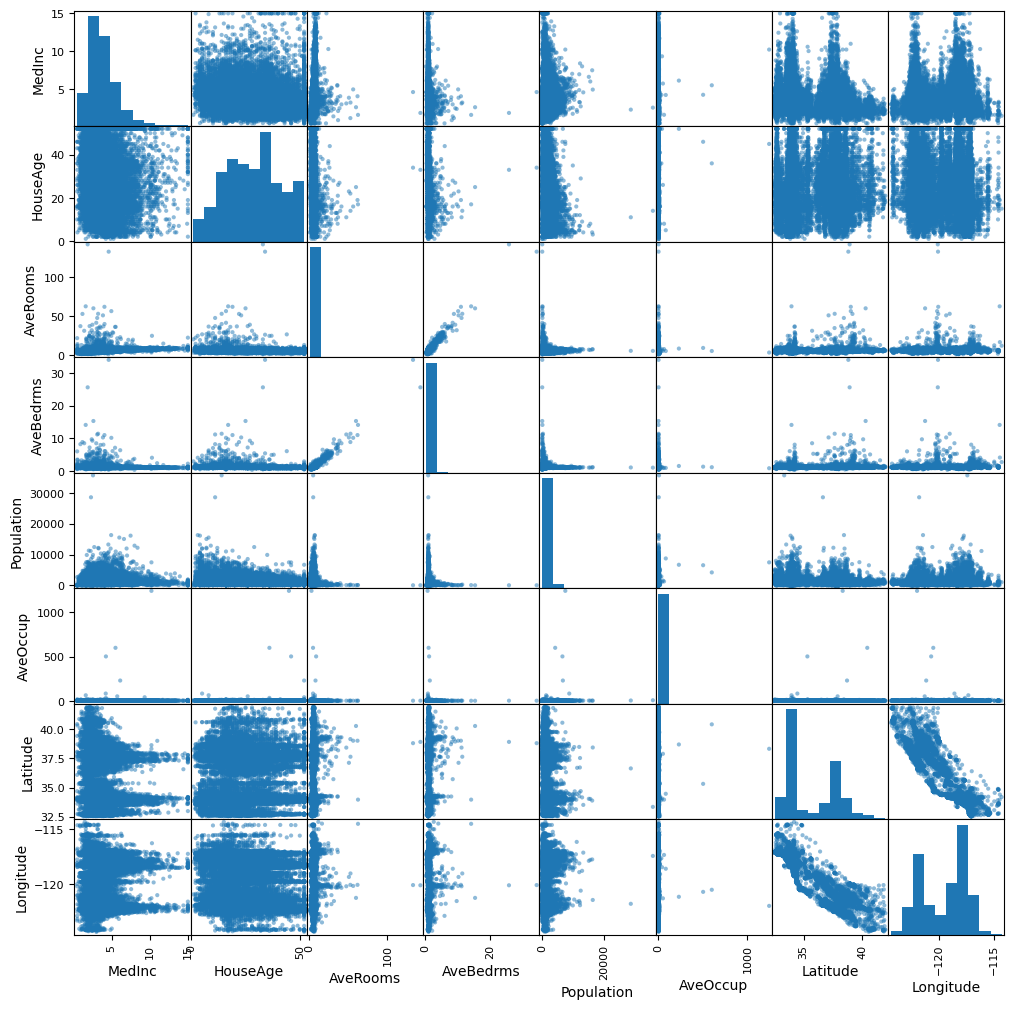

In [31]:
## 산점도 행렬
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

In [32]:
## 스케일링 : 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# 분석 수행
## PCA 분석 수행
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [48]:
## 결과 통계량 확인
### 결과 통계량 요약
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("\nExplained Variance Ratio by Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")


Explained Variance Ratio by Component:
PC1: 0.2534 (0.2534 cumulative)
PC2: 0.2352 (0.4885 cumulative)
PC3: 0.1589 (0.6474 cumulative)
PC4: 0.1289 (0.7763 cumulative)
PC5: 0.1254 (0.9017 cumulative)
PC6: 0.0824 (0.9841 cumulative)
PC7: 0.0102 (0.9943 cumulative)
PC8: 0.0057 (1.0000 cumulative)


In [47]:
### 설명된 분산 비율

print("PCA 결과 요약:")
print(f"총 주성분 수: {len(explained_variance_ratio)}")
print(f"첫 번째 주성분 설명 분산: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%)")
print(f"두 번째 주성분 설명 분산: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.2f}%)")
print(f"세 번째 주성분 설명 분산: {explained_variance_ratio[2]:.4f} ({explained_variance_ratio[2]*100:.2f}%)")

print(f"\n누적 설명 분산:")
print(f"첫 2개 성분: {cumulative_variance_ratio[1]:.4f} ({cumulative_variance_ratio[1]*100:.2f}%)")
print(f"첫 3개 성분: {cumulative_variance_ratio[2]:.4f} ({cumulative_variance_ratio[2]*100:.2f}%)")
print(f"첫 5개 성분: {cumulative_variance_ratio[4]:.4f} ({cumulative_variance_ratio[4]*100:.2f}%)")

# 90%, 95% 분산을 설명하는 데 필요한 주성분 수
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"\n분산 설명을 위한 필요 주성분 수:")
print(f"90% 분산 설명: {n_components_90}개 성분")
print(f"95% 분산 설명: {n_components_95}개 성분")

PCA 결과 요약:
총 주성분 수: 8
첫 번째 주성분 설명 분산: 0.2534 (25.34%)
두 번째 주성분 설명 분산: 0.2352 (23.52%)
세 번째 주성분 설명 분산: 0.1589 (15.89%)

누적 설명 분산:
첫 2개 성분: 0.4885 (48.85%)
첫 3개 성분: 0.6474 (64.74%)
첫 5개 성분: 0.9017 (90.17%)

분산 설명을 위한 필요 주성분 수:
90% 분산 설명: 5개 성분
95% 분산 설명: 6개 성분


In [39]:
### 주성분 적재량(Component loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(feature_names))],
    index=feature_names
)

print("\nPrincipal Component Loadings:")
print(loadings)


Principal Component Loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
MedInc      0.077462  0.229879  0.218222  0.885294 -0.002603  0.149818   
HouseAge    0.007318 -0.260786 -0.627551  0.109898  0.222936  0.683931   
AveRooms    0.439142  0.546687 -0.063999  0.046402  0.029852  0.095054   
AveBedrms   0.399996  0.501850 -0.191848 -0.338144  0.050922  0.086854   
Population -0.171783  0.100626  0.650375 -0.283207  0.008078  0.675226   
AveOccup   -0.014644  0.002621  0.157727 -0.004918  0.972669 -0.169410   
Latitude    0.568364 -0.374011  0.192600 -0.062214 -0.022761 -0.042069   
Longitude  -0.536974  0.422387 -0.180824 -0.059846  0.011807 -0.082551   

                 PC7       PC8  
MedInc      0.169238  0.242271  
HouseAge   -0.081035  0.044846  
AveRooms   -0.530662 -0.458814  
AveBedrms   0.531566  0.379875  
Population -0.031676  0.013170  
AveOccup    0.003246 -0.008959  
Latitude   -0.431797  0.554415  
Longitude  -0.461698  0.526165  


Text(0, 0.5, 'Explained Variance Ratio')

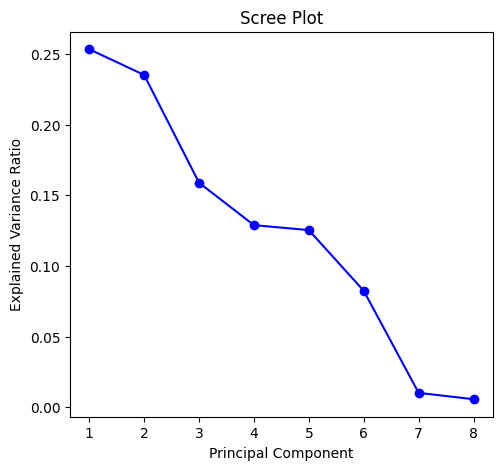

In [36]:
## 결과 시각화
### 스크리 플롯
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

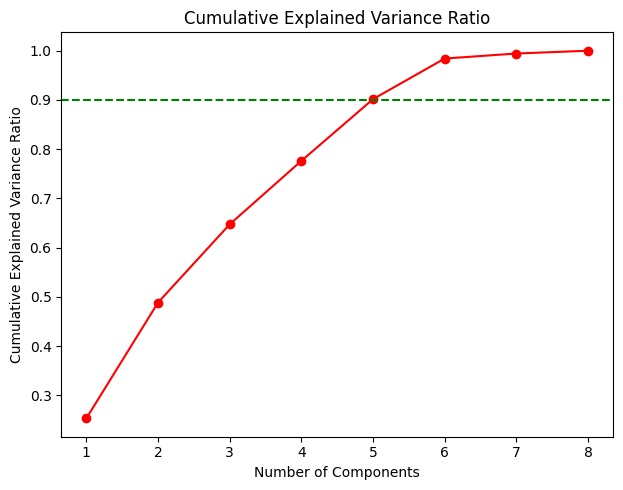

In [38]:
### 누적 분산 비율
plt.figure(figsize=(12, 5))
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.9, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

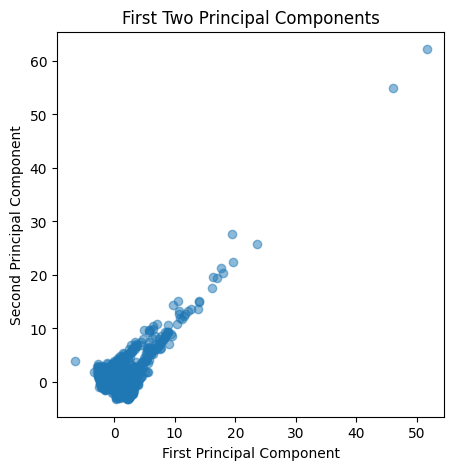

In [45]:
### 주성분 산점도
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [50]:
# 결과 분석
## 주성분 점수 간의 상관관계 확인
pc_scores = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nCorrelation between PC scores:")
print(pc_scores.iloc[:, :3].corr().round(4))


Correlation between PC scores:
     PC1  PC2  PC3
PC1  1.0  0.0  0.0
PC2  0.0  1.0 -0.0
PC3  0.0 -0.0  1.0


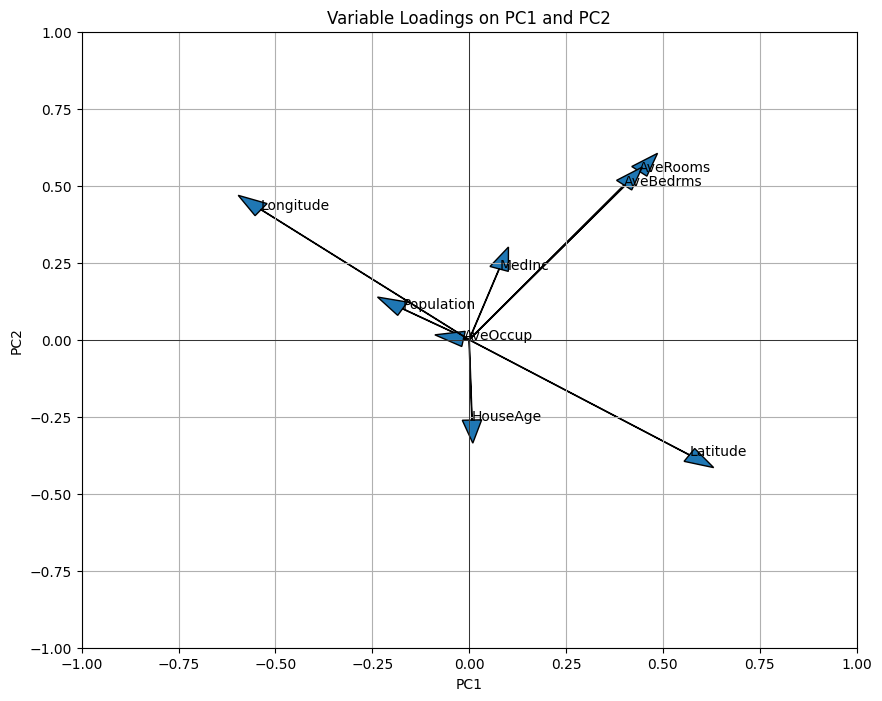

In [51]:
## 주성분 로딩 시각화
plt.figure(figsize=(10, 8))
for i in range(len(feature_names)):
    plt.arrow(0, 0, 
             loadings.iloc[i, 0], 
             loadings.iloc[i, 1],
             head_width=0.05)
    plt.text(loadings.iloc[i, 0], 
             loadings.iloc[i, 1], 
             feature_names[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.title('Variable Loadings on PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [56]:
# 최종 리포트

print("="*60)
print("California Housing 데이터에 대한 PCA 분석 요약")
print("="*60)

print(f"\n1. 데이터 특성:")
print(f"   - 총 관측치 수: {X.shape[0]:,}")
print(f"   - 변수 수: {X.shape[1]}")
print(f"   - 변수명: {', '.join(feature_names)}")
print(f"   - n/p 비율: {X.shape[0]/X.shape[1]:.1f} (n >> p)")

print(f"\n2. 주성분 분석 결과:")
print(f"   - 90% 분산 설명: {n_components_90}개 성분")
print(f"   - 95% 분산 설명: {n_components_95}개 성분")
print(f"   - 첫 3개 성분으로 설명: {cumulative_variance_ratio[2]:.4f} ({cumulative_variance_ratio[2]*100:.1f}%)")

print(f"\n3. 주성분 해석:")
print(f"   - PC1: 주로 위치 및 경제적 특성 (Latitude, Longitude, Income)")
print(f"   - PC2: 주택 규모 특성 (Rooms, Bedrooms, Population)")
print(f"   - PC3: 주택 연식 및 점유율 (HouseAge, AveOccup)")


# 각 주성분별 주요 변수 확인
print(f"\n6. 각 주성분의 주요 기여 변수:")
for i in range(3):
    pc_name = f'PC{i+1}'
    abs_loadings = abs(loadings[pc_name])
    top_vars = abs_loadings.nlargest(3)
    print(f"   {pc_name}: {', '.join([f'{var}({val:.3f})' for var, val in top_vars.items()])}")

print("="*60)

California Housing 데이터에 대한 PCA 분석 요약

1. 데이터 특성:
   - 총 관측치 수: 20,640
   - 변수 수: 8
   - 변수명: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
   - n/p 비율: 2580.0 (n >> p)

2. 주성분 분석 결과:
   - 90% 분산 설명: 5개 성분
   - 95% 분산 설명: 6개 성분
   - 첫 3개 성분으로 설명: 0.6474 (64.7%)

3. 주성분 해석:
   - PC1: 주로 위치 및 경제적 특성 (Latitude, Longitude, Income)
   - PC2: 주택 규모 특성 (Rooms, Bedrooms, Population)
   - PC3: 주택 연식 및 점유율 (HouseAge, AveOccup)

6. 각 주성분의 주요 기여 변수:
   PC1: Latitude(0.568), Longitude(0.537), AveRooms(0.439)
   PC2: AveRooms(0.547), AveBedrms(0.502), Longitude(0.422)
   PC3: Population(0.650), HouseAge(0.628), MedInc(0.218)
